# 1. Machine Learning Models on Original Data

This notebook implements some ML models in the original data.

## 1. Import Dependencies

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import randint
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 2. Load, Scale & Split the Data

In [20]:
# Load the x_minmax_scale dataset
X = pd.read_csv(r"/Users/michelhilg/Documents/Projects/steel-data-PCA-SMOTE/data/processed/features.csv")
X.head(5)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000


In [34]:
# Load the target dataset
y = pd.read_csv(r"/Users/michelhilg/Documents/Projects/steel-data-PCA-SMOTE/data/processed/target_categorical.csv")

# Flatten y to convert it to a 1D array
y = y.values.flatten()

In [75]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 42)

In [76]:
# Scale the features using MinMaxScaler
minmax_scaler = MinMaxScaler(feature_range =(0,1))
X_train = minmax_scaler.fit_transform(X_train)
X_test = minmax_scaler.transform(X_test)

## 3. Machine Learning Models

### 3.1. KNN Classifier

In [77]:
# Fit the Data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate the performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.49      0.67      0.57       273
   Dirtiness       0.65      0.79      0.71        39
    K_Scatch       0.96      0.89      0.93       283
Other_Faults       0.65      0.55      0.59       464
      Pastry       0.65      0.40      0.49       115
      Stains       0.61      0.87      0.72        45
   Z_Scratch       0.74      0.80      0.77       140

    accuracy                           0.67      1359
   macro avg       0.68      0.71      0.68      1359
weighted avg       0.69      0.67      0.67      1359



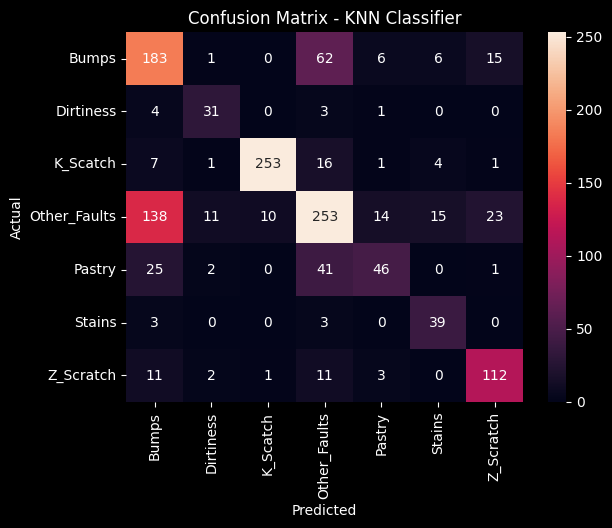

In [78]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get unique class labels from y_test
classes = np.unique(y_test)

# Create a heatmap using seaborn
plt.style.use("dark_background")
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN Classifier")
plt.show()

### 3.2. Random Forest

In [79]:
# Fit the data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate the performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.62      0.68      0.65       273
   Dirtiness       0.81      0.54      0.65        39
    K_Scatch       0.98      0.88      0.93       283
Other_Faults       0.63      0.75      0.68       464
      Pastry       0.61      0.37      0.46       115
      Stains       0.93      0.89      0.91        45
   Z_Scratch       0.95      0.77      0.85       140

    accuracy                           0.73      1359
   macro avg       0.79      0.70      0.73      1359
weighted avg       0.75      0.73      0.73      1359



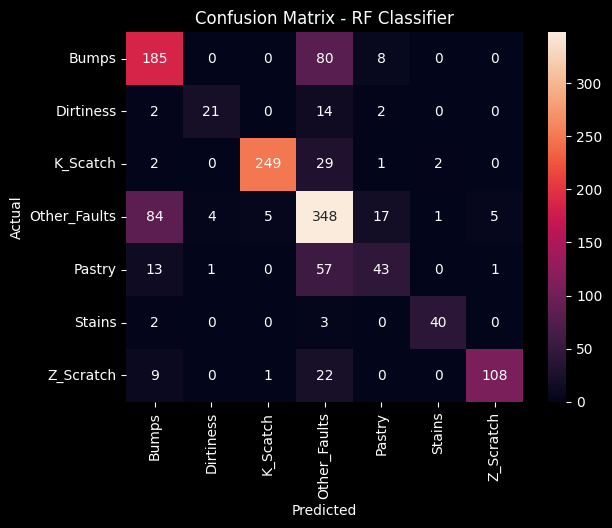

In [80]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get unique class labels from y_test
classes = np.unique(y_test)

# Create a heatmap using seaborn
plt.style.use("dark_background")
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RF Classifier")
plt.show()

## 4. Hyperparameter Tunning

In [86]:
param_dist = {'n_estimators': randint(50,750),
              'max_depth': randint(1,40)}

# Use random search to find the best hyperparameters
rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=20, 
                                 cv=20)

# Create a variable for the best model
rand_search.fit(X_train, y_train)
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

/Users/michelhilg/anaconda3/envs/steel-plates/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 16 members, which is less than n_splits=20.
  warnings.warn(


Best hyperparameters: {'max_depth': 16, 'n_estimators': 257}


In [87]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.63      0.69      0.66       273
   Dirtiness       0.84      0.54      0.66        39
    K_Scatch       0.98      0.89      0.93       283
Other_Faults       0.64      0.76      0.69       464
      Pastry       0.67      0.40      0.50       115
      Stains       0.93      0.89      0.91        45
   Z_Scratch       0.94      0.78      0.85       140

    accuracy                           0.74      1359
   macro avg       0.80      0.71      0.74      1359
weighted avg       0.76      0.74      0.74      1359



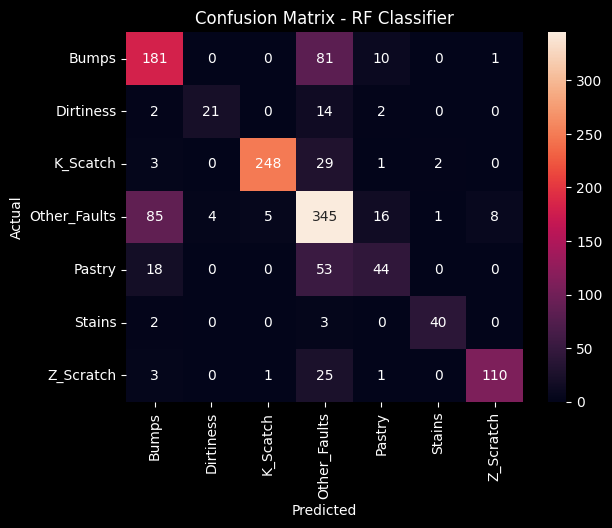

In [83]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
plt.style.use("dark_background")
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RF Classifier")
plt.show()